## Iris flower classification using Decision Tree Classifier
Google video tutorial: https://goo.gl/Ngw8wi

## Load Iris open source dataset

In [36]:
from sklearn.datasets import load_iris
iris = load_iris()

## Main attributes of Iris dataset

In [37]:
X = iris.data
y = iris.target
print iris.feature_names
print X[0]
print iris.target_names
print y[0]

['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
[ 5.1  3.5  1.4  0.2]
['setosa' 'versicolor' 'virginica']
0


## Create simple training and test sets

In [38]:
# import numpy as np
# test_index = [0, 50, 100]
# train_data=np.delete(iris.data, test_index, axis=0)
# train_target=np.delete(iris.target, test_index)
# test_data=iris.data[test_index]
# test_target=iris.target[test_index] 

from sklearn.cross_validation import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

## Train DescitionTreeClassifier with training set

In [39]:
from sklearn import tree
clf = tree.DecisionTreeClassifier()
clf.fit(X_train, y_train)
print clf

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            presort=False, random_state=None, splitter='best')


## Predict & compute accuracy

In [40]:
from sklearn.metrics import accuracy_score
y_predicted = clf.predict(X_test)
print "Accuracy scroe    %s" % accuracy_score(y_test, y_predicted)
print "Actual classes    %s" % y_test
print "Predicted classes %s" % y_predicted

Accuracy scroe    1.0
Actual classes    [2 1 2 1 0 0 1 2 1 1 1 2 1 2 1 0 1 0 0 0 2 0 1 1 2 2 0 0 0 0]
Predicted classes [2 1 2 1 0 0 1 2 1 1 1 2 1 2 1 0 1 0 0 0 2 0 1 1 2 2 0 0 0 0]


## Visualize decision tree of trained classifier

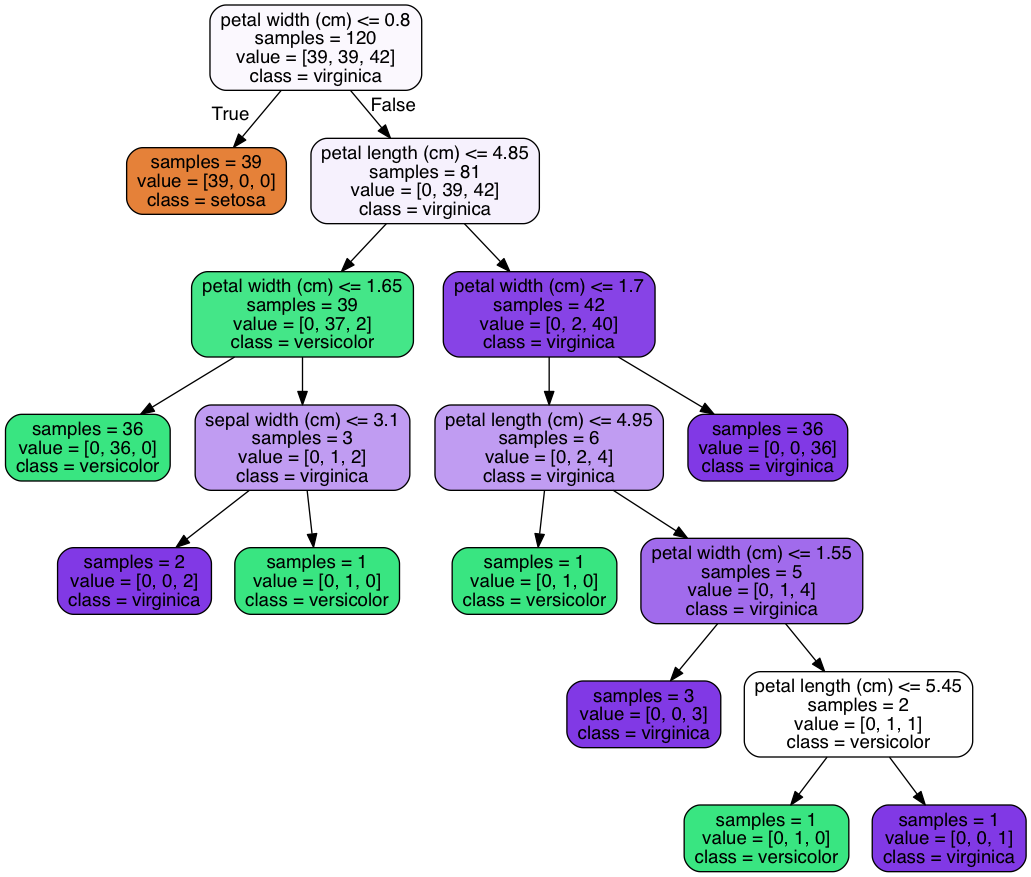

In [41]:
from sklearn.externals.six import StringIO
from IPython.display import Image 
dot_data = StringIO()
tree.export_graphviz(clf, out_file=dot_data, 
                         feature_names=iris.feature_names,  
                         class_names=iris.target_names,  
                         filled=True, rounded=True,  
                         impurity=False)  
import pydotplus
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
Image(graph.create_png()) 
# output as pdf: graph.write_pdf("<some directory>/iris_dt.pdf")